In [ ]:
#You must include a written description of three observable trends based on the data.

In [ ]:
#1 There is a relatively strong correlation bewteen latitude and temperature. 
# There is an increase in temperature for cities situated near the equator 

In [ ]:
#2 There seems to be no correlation between lattitude and temperature. 

In [ ]:
#3 Wind speed appears to slightly increase as we move away from the equator. 
#We would need to go beyond the ranged examined to make a definitive conclusion.


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [5]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=barrow
City not found. Skipping...
Processing Record 2 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=haines junction
Processing Record 3 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=busselton
Processing Record 4 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=kaitangata
Processing Record 5 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=bredasdorp
Processing Record 6 | Maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=maceio
Processing Record 7 | Marsberg
http://api

Processing Record 56 | Nongstoin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=nongstoin
Processing Record 57 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=arraial do cabo
Processing Record 58 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=butaritari
Processing Record 59 | Dodge City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=dodge city
Processing Record 60 | Dicabisagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=dicabisagan
Processing Record 61 | Kassala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=kassala
Processing Record 62 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817a

Processing Record 113 | Virar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=virar
Processing Record 114 | Bastia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=bastia
Processing Record 115 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=port elizabeth
Processing Record 116 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=new norfolk
Processing Record 117 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=sitka
Processing Record 118 | Lappeenranta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=lappeenranta
City not found. Skipping...
Processing Record 119 | Berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 168 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=pangnirtung
Processing Record 169 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=henties bay
Processing Record 170 | Urbana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=urbana
Processing Record 171 | Wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=wanning
Processing Record 172 | Coolum Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=coolum beach
Processing Record 173 | Baruun-Urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=baruun-urt
Processing Record 174 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1c

Processing Record 224 | Khorinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=khorinsk
Processing Record 225 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=guerrero negro
Processing Record 226 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=tuktoyaktuk
Processing Record 227 | Terra Roxa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=terra roxa
Processing Record 228 | Mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=mecca
Processing Record 229 | Thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=thinadhoo
Processing Record 230 | Grand-Lahou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1

Processing Record 279 | Boyolangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=boyolangu
City not found. Skipping...
Processing Record 280 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=kruisfontein
Processing Record 281 | Modra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=modra
City not found. Skipping...
Processing Record 282 | Carroll
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=carroll
Processing Record 283 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=port hardy
Processing Record 284 | Sohag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=sohag
Processing Record 285 | Petropavlovsk-Kamchatskiy
http://api.openweatherma

Processing Record 334 | Vangaindrano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=vangaindrano
Processing Record 335 | Karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=karratha
Processing Record 336 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=poum
Processing Record 337 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=sioux lookout
Processing Record 338 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=esperance
Processing Record 339 | Iralaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=iralaya
City not found. Skipping...
City not found. Skipping...
Processing Record 340 | Visby
http://api.openweathermap.org/data

Processing Record 390 | Moerai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=moerai
Processing Record 391 | Khudumelapye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=khudumelapye
Processing Record 392 | Rabaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=rabaul
Processing Record 393 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=camacha
Processing Record 394 | Roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=roald
Processing Record 395 | Namwala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=namwala
Processing Record 396 | Thunder Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=t

Processing Record 446 | Mathbaria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=mathbaria
Processing Record 447 | Kolyvan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=kolyvan
City not found. Skipping...
Processing Record 448 | Gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=gamba
Processing Record 449 | Khorramshahr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=khorramshahr
Processing Record 450 | Solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=solnechnyy
Processing Record 451 | Ossora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=ossora
Processing Record 452 | Panzhihua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 503 | Magaria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=magaria
Processing Record 504 | Bushehr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=bushehr
Processing Record 505 | Medicine Hat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=medicine hat
Processing Record 506 | Morros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=morros
Processing Record 507 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=meulaboh
Processing Record 508 | San Policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773270c330b626e&q=san policarpo
Processing Record 509 | Bichena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26817ad1cf36198fd773

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Dictionary
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

#DF from dictionary
weather_data = pd.DataFrame(weatherpy_dict)


weather_data.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [7]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,13,AR,1565562735,59,-38.31,-60.23,47.87,5.35
1,Haines Junction,100,CA,1565562737,37,60.75,-137.51,63.35,1.97
2,Busselton,0,AU,1565562738,45,-33.64,115.35,53.01,21.39
3,Kaitangata,54,NZ,1565562739,88,-46.28,169.85,44.01,4.00
4,Bredasdorp,28,ZA,1565562740,76,-34.53,20.04,54.00,10.29


In [9]:
#Save
weather_data.to_csv('weather_data.csv')

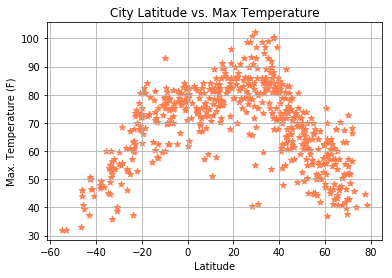

In [22]:
#Scatter plot design
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "coral", marker="*", s=40)

#I tried to make the stars have a solid black border around them but struggled with that
#linewidths=
#lw=
#edgecolors=
#ec=

#Other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()

In [23]:
#Save
plt.savefig("Max_Temp_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

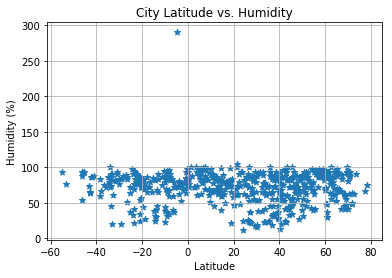

In [12]:
#Scatter plot design
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="*", s=40)

#Other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

In [13]:
#Save
plt.savefig("Humidity_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

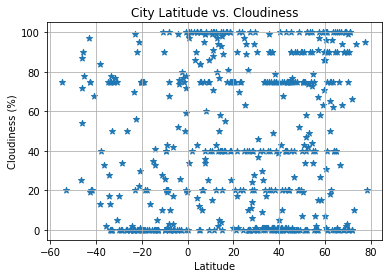

In [20]:
#Scatter plot design
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="*", s=40)

#Other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

In [21]:
#Save
plt.savefig("Cloudiness_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

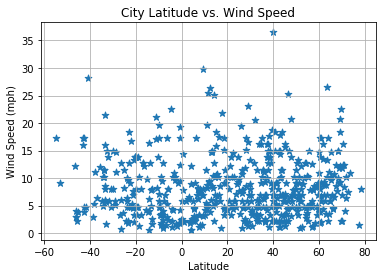

In [18]:
#Scatter plot design
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="*", s=50)

#Other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

In [19]:
#Save
plt.savefig("Wind_Speed_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>